In [44]:
#必要なモジュールのインストール
!pip install japanize-matplotlib
!pip install seaborn
!pip install LightGBM
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [45]:
#データの読み込み
df = pd.read_csv('./SSDSE-A-2023.csv',encoding="cp932",header=2)
df

,地域コード,都道府県,市区町村,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,...,小売店数,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数（基本票）
0,R01100,北海道,札幌市,1973395,918682,1054713,1933094,897727,1035367,215366,...,11197,8502,355,178,1375,1205,6978,2142,5758,343
1,R01202,北海道,函館市,251084,113965,137119,248208,112718,135490,23560,...,2533,1749,41,26,207,126,822,182,683,53
2,R01203,北海道,小樽市,111299,50136,61163,109971,49441,60530,9169,...,1289,778,17,11,80,78,338,105,334,23
3,R01204,北海道,旭川市,329306,152108,177198,325287,150318,174969,34691,...,2612,1743,65,36,225,171,1364,246,876,71
4,R01205,北海道,室蘭市,82383,40390,41993,81658,39960,41698,7769,...,748,621,11,6,52,40,249,56,193,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,R47361,沖縄県,久米島町,7192,3823,3369,7152,3802,3350,1075,...,104,60,0,1,3,1,5,1,12,4
1737,R47362,沖縄県,八重瀬町,30941,15244,15697,30805,15148,15657,5977,...,157,58,3,1,12,7,82,16,47,14
1738,R47375,沖縄県,多良間村,1058,575,483,1047,574,473,150,...,17,5,0,0,1,1,1,2,0,1
1739,R47381,沖縄県,竹富町,3942,2033,1909,3898,2013,1885,707,...,52,52,0,0,7,3,6,2,0,0


In [46]:
#selected_rows=df.iloc[0:,3:]
#予測ターゲットの格納（住宅価格：A列）
#target_df= df[["出生数"]]
#特徴量の格納（説明変数：B列以降）
#train_df = selected_rows.drop("出生数", axis=1)
#train_df=selected_rows
#selected_rows

selected_rows=df.iloc[0:,3:]
#予測ターゲットの格納（住宅価格：A列）
selected_rows.loc[selected_rows['総人口'] == 0, '出生数'] = 0
selected_rows.loc[selected_rows['総人口'] == 0, '総人口'] = 1
target_df= (selected_rows["出生数"]/selected_rows['総人口'])
#特徴量の格納（説明変数：B列以降）
train_df = selected_rows.drop("出生数", axis=1)
#train_df=selected_rows
target_df
# 予測対象の式内でNaNや無限大となる可能性がある箇所を確認
print("NaN in prediction target:", (selected_rows["出生数"]/selected_rows['総人口']).isnull().any())
print(selected_rows.loc[selected_rows['総人口'] == 0, '出生数'])

NaN in prediction target: False
Series([], Name: 出生数, dtype: int64)


In [47]:
#モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)


In [48]:
#XGBoostで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

In [49]:
#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26311
[LightGBM] [Info] Number of data points in the train set: 1218, number of used features: 124
[LightGBM] [Info] Start training from score 0.005794


[0.00693389 0.00533248 0.00658901 0.00399638 0.00945658 0.00221184
 0.00651195 0.00563525 0.00640087 0.00603508 0.00505641 0.00745761
 0.0034968  0.00902968 0.00505024 0.00745682 0.00589477 0.00562824
 0.00782574 0.00686531 0.0056458  0.00345547 0.00478681 0.00499342
 0.0072931  0.003868   0.00612138 0.00422267 0.00427623 0.00509658
 0.00626305 0.00527548 0.00562721 0.00833039 0.00479899 0.00580213
 0.00504008 0.00432826 0.00534389 0.00478735 0.00551948 0.00271212
 0.00386297 0.00411856 0.00343265 0.00508242 0.00442254 0.00597585
 0.00707454 0.00587896 0.00578737 0.006837   0.0056005  0.00584153
 0.00570036 0.00504149 0.00421144 0.00742646 0.00596735 0.00582485
 0.00644465 0.00501536 0.00940011 0.00328304 0.00630264 0.00659804
 0.00625754 0.00749819 0.00498867 0.00838777 0.0075671  0.00533598
 0.00501131 0.00546357 0.00461517 0.00164682 0.0047082  0.00659916
 0.00626823 0.0082354  0.00354776 0.00717602 0.00444904 0.00640908
 0.00725692 0.00434465 0.00767804 0.00464092 0.00712888 0.0056

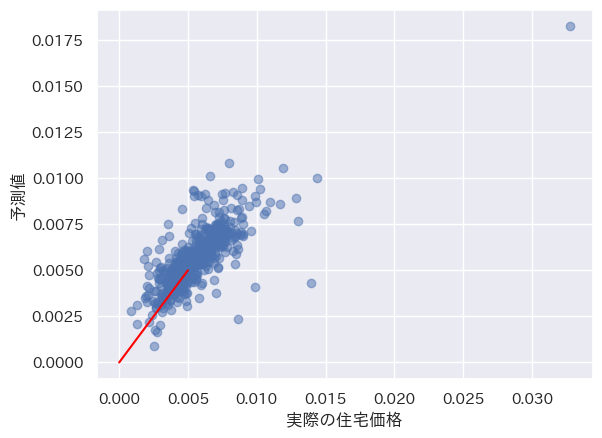

In [52]:
#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['IPAexGothic','IPAexGothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 0.005, 50), np.linspace(0, 0.005, 50), "red")
plt.xlabel('実際の住宅価格')
plt.ylabel('予測値')
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

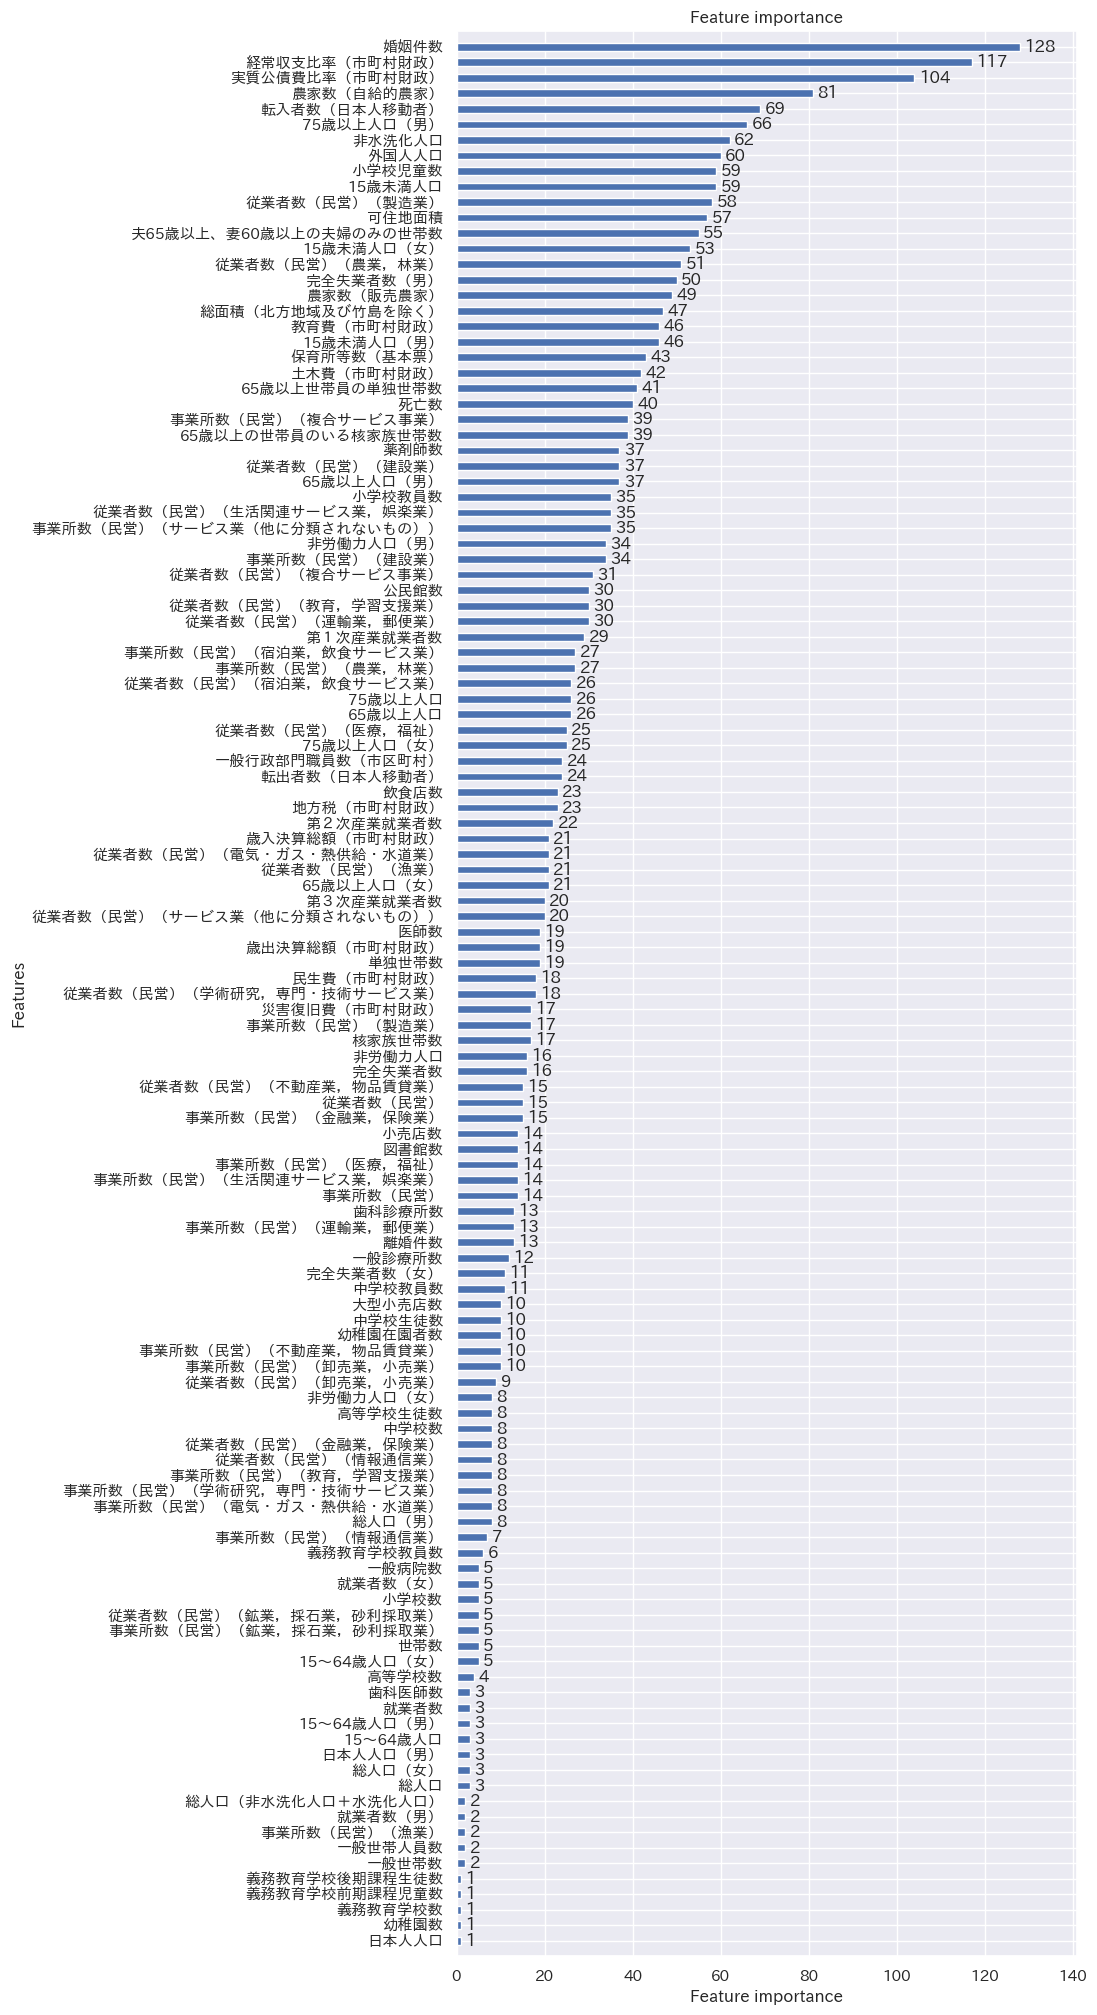

In [51]:
# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,25))